In [3]:
def loadAndFormatData(filename):
    data = pd.read_csv(filename, sep=", ", header=None)
    data.columns = ["x1", "x2", "x3", "x4","x5","x6","x7","x8","x9","x10","x11","x12"]
#     data.drop(["x3", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16"], axis=1, inplace=True)
    print(data.shape)
    return data


import pandas as pd
import numpy as np

# dataLeftMost = loadAndFormatData('sonarLogLeftMost.txt')
# print(dataLeftMost.info())

dataLeft = loadAndFormatData('sonarLogL.txt')
# print(dataLeft.head())
# dataRightMost = loadAndFormatData('sonarLogRightMost.txt')
dataRight = loadAndFormatData('sonarLogR.txt')
dataMid = loadAndFormatData('sonarLogM.txt')


C:\ProgramData\Miniconda2\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


(2400, 12)
(2380, 12)
(2420, 12)


In [5]:
# frequency ~~ 50Hz
# dataLeftMost.info()

def removeOutliers(dataFrame):
    print("before removal: ", dataFrame.shape)
    d_mean = dataFrame.mean()
    d_std = dataFrame.std()
    # dataFrame.describe()
    outlier_index = []
    for column in dataFrame:
    #     print(dataFrame[column])
        for ind, val in enumerate(dataFrame[column]):
    #         print(i, j)
            if val > (d_mean[column] + 3*d_std[column]) or val < (d_mean[column] - 3*d_std[column]):
                outlier_index.append(ind)

    outlier_index = list(set(outlier_index))
#     print(outlier_index, len(outlier_index))
    result = dataFrame.drop(dataFrame.index[outlier_index])
    result.reset_index(drop=True, inplace=True)
    print("after removal: ", result.shape)
    return result


dataLeft = removeOutliers(dataLeft)
dataRight = removeOutliers(dataRight)
dataMid = removeOutliers(dataMid)

('before removal: ', (2400, 12))
('after removal: ', (2049, 12))
('before removal: ', (2380, 12))
('after removal: ', (1933, 12))
('before removal: ', (2420, 12))
('after removal: ', (2236, 12))


In [6]:
def movingAvg(dataSet, winSize=5):
#     print(dataSet.head(20))    
    ma_data = dataSet.copy()
    for ind, col in enumerate(dataSet):
        ma_data[col] = dataSet[col].rolling(window=winSize).mean()

#     print(ma_data.head(20), ma_data.shape)
    ma_data.dropna(inplace=True)
    ma_data.reset_index(drop=True, inplace=True)
#     print(ma_data.head(10), ma_data.shape)    
    return ma_data


# col_names =  ['MA1', 'MA2', 'MA3', 'MA4', 'MA5', 'MA6']
dataLeft = movingAvg(dataLeft, winSize = 5)
dataRight = movingAvg(dataRight, winSize = 5)
dataMid = movingAvg(dataMid, winSize = 5)



In [ ]:
def featureExtaction(df):
    result, header = [], []
    for ind in range(sum(range(df.shape[1]))):
        header.append("x{}".format(ind))
    
    for i in range(df.shape[0]):
        temp = []
        for j in range(len(df.iloc[i])-1):
            for k in range(j+1, len(df.iloc[i])):
                temp.append(df.iloc[i, j] - df.iloc[i, k])
        result.append(temp)    
    
#     print(len(result), len(temp), len(header), len(df.iloc[i]))
    return pd.DataFrame(result, columns=header)


# f_dataLeft = featureExtaction(dataLeftMA)
# f_dataRight = featureExtaction(dataRightMA)
# f_dataMid = featureExtaction(dataMidMA)


In [8]:
dataLeft.info()
dataLeft.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 12 columns):
x1     2045 non-null float64
x2     2045 non-null float64
x3     2045 non-null float64
x4     2045 non-null float64
x5     2045 non-null float64
x6     2045 non-null float64
x7     2045 non-null float64
x8     2045 non-null float64
x9     2045 non-null float64
x10    2045 non-null float64
x11    2045 non-null float64
x12    2045 non-null float64
dtypes: float64(12)
memory usage: 191.8 KB


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
count,2045.000000,2045.000000,2045.000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000
mean,0.506819,0.241922,65.529,0.843664,2.577714,0.850702,0.505862,0.332883,65.537139,0.854854,2.596462,0.890752
std,0.004332,0.128851,0.000,0.005742,0.544426,0.004938,0.001862,0.160449,0.026382,0.018185,0.205585,0.040643
min,0.483200,0.127000,65.529,0.752600,0.698000,0.787000,0.499379,0.165127,65.529310,0.837107,2.101353,0.847870
25%,0.506200,0.161800,65.529,0.842200,2.348600,0.849000,0.505227,0.245745,65.529310,0.842935,2.423750,0.852449
50%,0.508000,0.226200,65.529,0.843600,2.959000,0.850800,0.506591,0.277511,65.529310,0.843946,2.606543,0.878457
75%,0.509200,0.288000,65.529,0.845600,2.959000,0.852800,0.507034,0.332087,65.529310,0.863660,2.744498,0.923760
max,0.515800,1.736000,65.529,0.852600,2.959000,0.908600,0.508197,0.983097,65.709772,0.924980,2.946718,1.002523


In [9]:
def labelAndCombineData(df_list):
    data_list = []
    label_list = []
    for ind, df in enumerate(df_list):
        temp = df.copy()
        label = pd.Series(ind, index=df.index, dtype=int)
        data_list.append(temp)
        label_list.append(label)
    
    return pd.concat(data_list, axis=0), pd.concat(label_list, axis=0)

# com_data, com_label = labelAndCombineData([pd.concat([dataLeftMostMA, dataLeftMA], axis=0), pd.concat([dataRightMostMA, dataRightMA], axis=0), dataMid])
com_data, com_label = labelAndCombineData([dataLeft, dataRight, dataMid])

# print(com_data, com_label)

 

In [11]:
# feature normalization
def normalizeTrainDF(dataFrame, mode="std"):
    result = dataFrame.copy()    
    params = pd.DataFrame(index=range(len(dataFrame.columns)),columns = ["std", "mean", "min", "max"])
    
    for ind, feature_name in enumerate(dataFrame.columns):
        std_value = dataFrame[feature_name].std()
        mean_value = dataFrame[feature_name].mean()
        max_value = dataFrame[feature_name].max()
        min_value = dataFrame[feature_name].min()
        params.iloc[ind] = [std_value, mean_value, max_value, min_value]        
        if mode == "std":
            result[feature_name] = ((dataFrame[feature_name] - mean_value) / std_value) if std_value else 0
        elif mode == "mean":
            result[feature_name] = ((dataFrame[feature_name] - mean_value) / (max_value - mean_value)) if (max_value - mean_value) else 0
        else:
            result[feature_name] = ((dataFrame[feature_name] - min_value) / (max_value - min_value)) if (max_value - min_value) else 0

    return result, params
        
norm_data, params = normalizeTrainDF(com_data)
print(norm_data.head(), params["std"][0])


def normalizeTestDF(dataFrame, params, mode="std"):
    result = dataFrame.copy()    
    
    for ind, feature_name in enumerate(dataFrame.columns):  
        print(ind, feature_name, dataFrame[feature_name].dtype,  params["mean"][ind].dtype)
        if mode == "std":
            result[feature_name] = ((dataFrame[feature_name] - params["mean"][ind]) / params["std"][ind]) if params["std"][ind] else 0
        elif mode == "mean":
            result[feature_name] = ((dataFrame[feature_name] - params["mean"][ind]) / (params["max"][ind] - params["mean"][ind])) if (params["max"][ind] - params["mean"][ind]) else 0
        else:
            result[feature_name] = ((dataFrame[feature_name] - params["min"][ind]) / (params["max"][ind] - params["min"][ind])) if (params["max"][ind] - params["min"][ind]) else 0

    return result
    


(         x1        x2  x3        x4        x5        x6        x7        x8  \
0  0.078900 -0.658369   0 -0.178238  0.025520 -0.296063 -0.066013 -1.007603   
1  0.077018 -0.551203   0 -0.182243  0.111190 -0.295736 -0.066041 -1.007713   
2  0.075136 -0.579038   0 -0.184468  0.342278 -0.295410 -0.066099 -1.008151   
3  0.075136 -0.622183   0 -0.186693  0.342278 -0.294432 -0.066166 -1.007797   
4  0.075136 -0.757184   0 -0.188028  0.487695 -0.292801 -0.066232 -1.009038   

         x9       x10       x11       x12  
0  6.421172 -0.068015  0.770631 -0.222322  
1  6.312912 -0.071722  0.763127 -0.204992  
2  6.205742 -0.075424  0.759143 -0.187831  
3  6.140432 -0.077752  0.756409 -0.190970  
4  6.075726 -0.080076  0.755871 -0.194054  , 0.21257537846794519)


In [12]:
# dimension reduction
from sklearn.decomposition import PCA 
pca=PCA(n_components=3, copy=True, whiten=False)
reduced_data = pca.fit_transform(norm_data)
print(pca.components_, pca.n_components_, pca.explained_variance_ratio_, pca.mean_, pca.noise_variance_)




(array([[  1.42719525e-02,   1.14288704e-01,  -0.00000000e+00,
          4.38749761e-01,   2.45296670e-01,   4.52168099e-01,
         -2.10860451e-02,   1.01057376e-01,  -7.95733680e-02,
          4.85503361e-01,   2.05079388e-01,   4.84609534e-01],
       [ -2.16206173e-02,   5.39123898e-01,   1.66533454e-16,
         -5.85252690e-03,  -4.42666879e-01,   5.86922836e-02,
          6.74681084e-02,   4.92451511e-01,  -7.49575446e-03,
          4.20350672e-02,  -4.97233240e-01,   1.15414492e-01],
       [  5.62266607e-01,  -7.07247305e-02,   1.38777878e-17,
          9.21999710e-03,  -5.17767341e-02,  -1.29954243e-02,
          6.50726422e-01,  -7.94391951e-02,  -4.94291693e-01,
          1.58368551e-02,  -3.95051068e-02,  -5.32501726e-03]]), 3, array([ 0.30609137,  0.19181223,  0.12237826]), array([  2.22116163e-16,   3.66377176e-17,   0.00000000e+00,
        -1.09913153e-16,   1.46550870e-16,   2.38145164e-16,
         5.03768617e-16,  -1.09913153e-16,  -7.47272048e-13,
         7.32754

C:\ProgramData\Miniconda2\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<IPython.core.display.Javascript object>


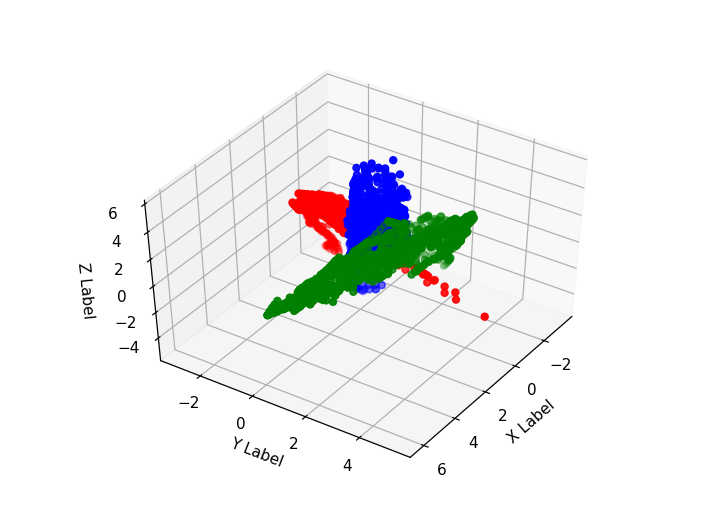

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
import ipympl
from mpl_toolkits.mplot3d import Axes3D




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_data[com_label==0, 0], reduced_data[com_label==0, 1], reduced_data[com_label==0, 2:], c='r', marker='o')
ax.scatter(reduced_data[com_label==1, 0], reduced_data[com_label==1, 1], reduced_data[com_label==1, 2:], c='b', marker='o')
ax.scatter(reduced_data[com_label==2, 0], reduced_data[com_label==2, 1], reduced_data[com_label==2, 2:], c='g', marker='o')
# ax.scatter(reduced_data[com_label==3, 0], reduced_data[com_label==3, 1], reduced_data[com_label==3, 2:], c='c', marker='o')
# ax.scatter(reduced_data[com_label==4, 0], reduced_data[com_label==4, 1], reduced_data[com_label==4, 2:], c='m', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [16]:
from sklearn import linear_model
from sklearn import metrics, cross_validation

logreg = linear_model.LogisticRegression(C=1e4)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(norm_data, com_label)


predicted = cross_validation.cross_val_predict(logreg, norm_data, com_label, cv=100)
print metrics.accuracy_score(com_label, predicted)
print metrics.classification_report(com_label, predicted) 


0.972929423139
             precision    recall  f1-score   support

          0       1.00      0.95      0.98      2045
          1       0.93      0.98      0.96      1929
          2       0.99      0.98      0.98      2232

avg / total       0.97      0.97      0.97      6206



In [ ]:
def makePredction():
    data = loadAndFormatData('sonarLog.txt')    
    dataMA = movingAvg(data,  winSize = 5)
    dataNorm = normalizeTestDF(dataMA, params)
    with open("prediction.txt", "a") as myfile:
        for i in range(dataNorm.shape[0]):
            current = dataNorm.iloc[i].values.reshape(1, -1)
#             print(current, str(logreg.predict(current)[0]))
            myfile.write(str(logreg.predict(current)[0]))
    
# makePredction()

In [ ]:
def segmentData(df, winSize=5): # offset ???
    temp_list = []
    col_names = []
    for i in range(len(df.columns)*winSize):
        col_names.append("x{}".format(i))
        
    for i in range(0, df.shape[0]-winSize, winSize):
        temp = pd.DataFrame(df.iloc[i:i+winSize, :].values.reshape(1, len(df.columns)*winSize), range(1), columns=col_names)
        
        temp_list.append(temp)
    
    
    result = pd.concat(temp_list, axis=0)
    result = result.reset_index(drop=True)
    print(result.head())
    return result
    
# segLM_MA = segmentData(dataLeftMostMA)
segL_MA = segmentData(dataLeftMA)
# segRM_MA = segmentData(dataRightMostMA)
segR_MA = segmentData(dataRightMA)
segM_MA = segmentData(dataMidMA)



In [ ]:
com_seg_data, com_seg_label = labelAndCombineData([segL_MA, segR_MA, segM_MA])
# print(com_seg_data, com_seg_label)

norm_seg_data, params = normalizeTrainDF(com_seg_data)
print(norm_seg_data.head())

pca=PCA(n_components=3, copy=True, whiten=False)
reduced_seg_data = pca.fit_transform(norm_seg_data)



In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_seg_data[com_seg_label==0, 0], reduced_seg_data[com_seg_label==0, 1], reduced_seg_data[com_seg_label==0, 2:], c='r', marker='o')
ax.scatter(reduced_seg_data[com_seg_label==1, 0], reduced_seg_data[com_seg_label==1, 1], reduced_seg_data[com_seg_label==1, 2:], c='b', marker='o')
ax.scatter(reduced_seg_data[com_seg_label==2, 0], reduced_seg_data[com_seg_label==2, 1], reduced_seg_data[com_seg_label==2, 2:], c='g', marker='o')
# ax.scatter(reduced_seg_data[com_seg_label==3, 0], reduced_seg_data[com_seg_label==3, 1], reduced_seg_data[com_seg_label==3, 2:], c='c', marker='o')
# ax.scatter(reduced_seg_data[com_seg_label==4, 0], reduced_seg_data[com_seg_label==4, 1], reduced_seg_data[com_seg_label==4, 2:], c='m', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
logreg = linear_model.LogisticRegression(C=10)

pca=PCA(n_components=5, copy=True, whiten=False)
reduced_seg_data = pca.fit_transform(norm_seg_data)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(reduced_seg_data, com_seg_label)


predicted = cross_validation.cross_val_predict(logreg, reduced_seg_data, com_seg_label, cv=10)
print metrics.accuracy_score(com_seg_label, predicted)
print metrics.classification_report(com_seg_label, predicted) 